In [65]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
carData = pd.read_csv('SG_usedcar.csv')
carData = carData.drop(['Reg_date','Dep','Road Tax','Curb Weight','Manufactured','Transmission','ARF','Power','Engine Cap'],axis=1)

In [67]:
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),N.A,38133,67304,41566,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,10yrs COE left),110000,N.A,N.A,18180,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,7yrs 8mths 5days COE left),N.A,N.A,25727,10763,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800,NaN


In [68]:
#Change N.A to nan
carData = carData.replace('N.A',np.nan)
carData = carData.replace('N.A.',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4411 non-null   object 
 1   Type           4411 non-null   object 
 2   Coe_left       4389 non-null   object 
 3   Mileage        2851 non-null   object 
 4   Dereg Value    3446 non-null   object 
 5   COE            4152 non-null   object 
 6   OMV            3993 non-null   object 
 7   No. of Owners  4339 non-null   object 
 8   Price          3676 non-null   object 
 9   Unnamed: 18    15 non-null     float64
dtypes: float64(1), object(9)
memory usage: 344.7+ KB


In [69]:
# get the number of missing data points per column
missing_values_count = carData.isnull().sum()
missing_values_count

Brand               0
Type                0
Coe_left           22
Mileage          1560
Dereg Value       965
COE               259
OMV               418
No. of Owners      72
Price             735
Unnamed: 18      4396
dtype: int64

In [70]:
#Removing missing values
carData.dropna(subset=['Brand','Type','Coe_left','Mileage','Dereg Value','No. of Owners','OMV','COE','Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4409
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          2529 non-null   object 
 1   Type           2529 non-null   object 
 2   Coe_left       2529 non-null   object 
 3   Mileage        2529 non-null   object 
 4   Dereg Value    2529 non-null   object 
 5   COE            2529 non-null   object 
 6   OMV            2529 non-null   object 
 7   No. of Owners  2529 non-null   object 
 8   Price          2529 non-null   object 
 9   Unnamed: 18    0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 217.3+ KB


In [71]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4409
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          2529 non-null   object 
 1   Type           2529 non-null   object 
 2   Coe_left       2529 non-null   object 
 3   Mileage        2529 non-null   object 
 4   Dereg Value    2529 non-null   object 
 5   COE            2529 non-null   object 
 6   OMV            2529 non-null   object 
 7   No. of Owners  2529 non-null   object 
 8   Price          2529 non-null   object 
 9   Unnamed: 18    2529 non-null   float64
dtypes: float64(1), object(9)
memory usage: 217.3+ KB


In [72]:
import warnings

# Temporary suppress SettingWithCopyWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    for i, v in enumerate(carData['Brand']):
        wordstr = v.split()
        carData['Brand'].loc[i] = str(wordstr[0])  # This line may raise SettingWithCopyWarning, but it will be suppressed

# Function to extract main brand
def extract_main_brand(brand):
    if isinstance(brand, str):
        return brand.split()[0]
    else:
        return np.nan

# Extract main brands from the 'Brand' column
carData['Brand'] = carData['Brand'].apply(extract_main_brand)

# Display the modified DataFrame
carData.head()


,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price,Unnamed: 18
1,Suzuki,SUV,4yrs 4mths 7days COE left),50000,31237,56001,19775,2,49800,0.0
4,Kia,Hatchback,1yr 6mths 21days COE left),203000,6656,21349,12154,2,12800,0.0
5,BMW,Sports Car,6yrs 1mth 12days COE left),21000,106829,50110,71979,1,259988,0.0
13,Honda,Mid-Sized Sedan,3yrs 5mths 7days COE left),35000,31339,64900,13856,1,44800,0.0
15,BMW,Mid-Sized Sedan,8yrs 27days COE left),21200,38416,30009,18894,1,85800,0.0


In [73]:
carData['Brand'].value_counts()

Brand
Mercedes-Benz    424
Honda            359
Toyota           337
BMW              262
Volkswagen       125
Mitsubishi       117
Audi             115
Mazda            112
Nissan           103
Hyundai           96
Kia               71
Subaru            61
Porsche           59
Lexus             52
Volvo             33
MINI              31
Suzuki            29
Chevrolet         15
Bentley           14
SEAT              12
Ferrari           10
Peugeot           10
McLaren           10
Opel               9
Ford               9
Skoda              9
Land               8
Maserati           8
Infiniti           5
Lamborghini        4
Citroen            3
Proton             3
Renault            3
Hummer             2
Perodua            2
Rolls-Royce        2
Aston              1
Jeep               1
Alfa               1
Jaguar             1
Cadillac           1
Name: count, dtype: int64

In [74]:
# Function to convert COE left to months
def coe_to_months(coe):
    if isinstance(coe, str):
        coe_parts = coe.split()
        total_months = 0
        for part in coe_parts:
            if 'yr' in part or 'yrs' in part:
                total_months += int(part.strip('yrs').strip('yr')) * 12
            elif 'mth' in part or 'mths' in part:
                total_months += int(part.strip('mths').strip('mth'))
        return total_months
    else:
        return np.nan

# Convert 'Coe_left' to months
carData['Coe_left'] = carData['Coe_left'].apply(coe_to_months)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,COE,OMV,No. of Owners,Price,Unnamed: 18
1,Suzuki,SUV,52,50000,31237,56001,19775,2,49800,0.0
4,Kia,Hatchback,18,203000,6656,21349,12154,2,12800,0.0
5,BMW,Sports Car,73,21000,106829,50110,71979,1,259988,0.0
13,Honda,Mid-Sized Sedan,41,35000,31339,64900,13856,1,44800,0.0
15,BMW,Mid-Sized Sedan,96,21200,38416,30009,18894,1,85800,0.0


In [75]:
# create a list of fields to be converted to int
convert_dict = {'Mileage': 'int64','No. of Owners': 'int64','Price': 'int64',
                'Dereg Value':'int64','Type':'category'}
carData = carData.astype(convert_dict)
carData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2529 entries, 1 to 4409
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2529 non-null   object  
 1   Type           2529 non-null   category
 2   Coe_left       2529 non-null   int64   
 3   Mileage        2529 non-null   int64   
 4   Dereg Value    2529 non-null   int64   
 5   COE            2529 non-null   object  
 6   OMV            2529 non-null   object  
 7   No. of Owners  2529 non-null   int64   
 8   Price          2529 non-null   int64   
 9   Unnamed: 18    2529 non-null   float64 
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 264.9+ KB


In [76]:
brand_dummies = pd.get_dummies(carData['Brand'], prefix='Brand')
type_dummies = pd.get_dummies(carData['Type'], prefix='Type')

X = pd.concat([brand_dummies, type_dummies, carData[['Coe_left', 'Mileage', 'Dereg Value', 'No. of Owners', 'OMV', 'COE']]], axis=1)
y = carData['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
coefficients_df = pd.DataFrame({'Predictors': X_train.columns, 'Coefficients': linreg.coef_[0]})
print(coefficients_df)

Intercept of Regression 	: b =  -1960663489595.852
Coefficients of Regression 	: a =  [ 1.96066348e+12  1.96066350e+12  1.96066350e+12  1.96066350e+12
  1.96066347e+12  1.96066355e+12  1.96066350e+12  1.96066350e+12
  1.96066354e+12  1.96066351e+12  1.96066350e+12  1.96066350e+12
  1.96066350e+12  1.96066348e+12  1.96066351e+12  1.96066350e+12
  1.96066351e+12  1.96066347e+12  1.96066349e+12  1.96066350e+12
  1.96066350e+12  1.96066352e+12  1.96066350e+12  1.96066349e+12
  1.96066351e+12  1.96066350e+12  1.96066350e+12  1.96066349e+12
  1.96066350e+12  1.96066349e+12  1.96066352e+12  1.96066350e+12
  1.96066352e+12  1.96066350e+12  1.96066350e+12  1.96066351e+12
  1.96066350e+12  1.96066351e+12  1.96066350e+12  1.96066350e+12
  1.96066350e+12 -7.79419189e+02 -5.67381494e+03 -3.16599219e+03
 -4.67632324e+03  2.80595233e+03  1.57608652e+04 -4.27109155e+03
  3.95579590e+02 -1.08764648e-01  1.39550781e+00 -1.57130298e+03
  8.15429688e-01 -6.00463867e-01]

              Predictors  Coeffici

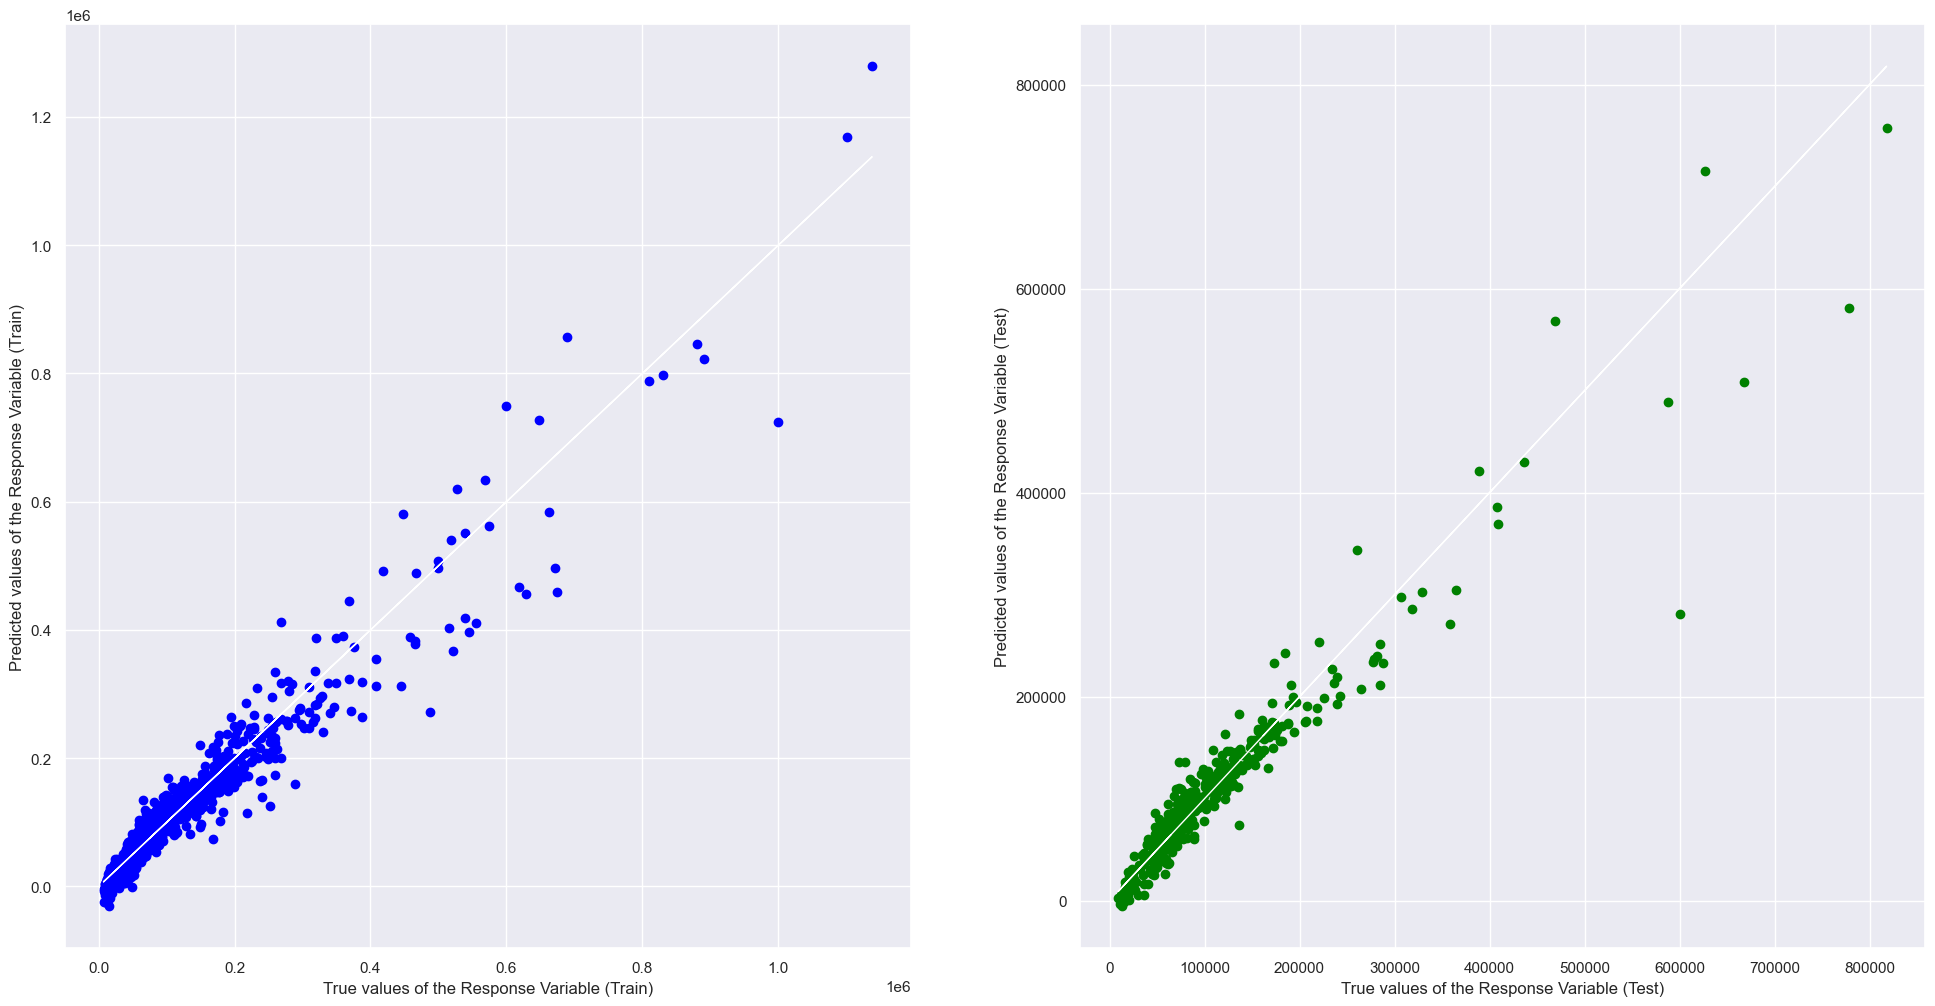

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9339708065533545
Mean Squared Error (MSE) 	: 590238629.5377569

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9180392793037102
Mean Squared Error (MSE) 	: 682987954.643863



In [78]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

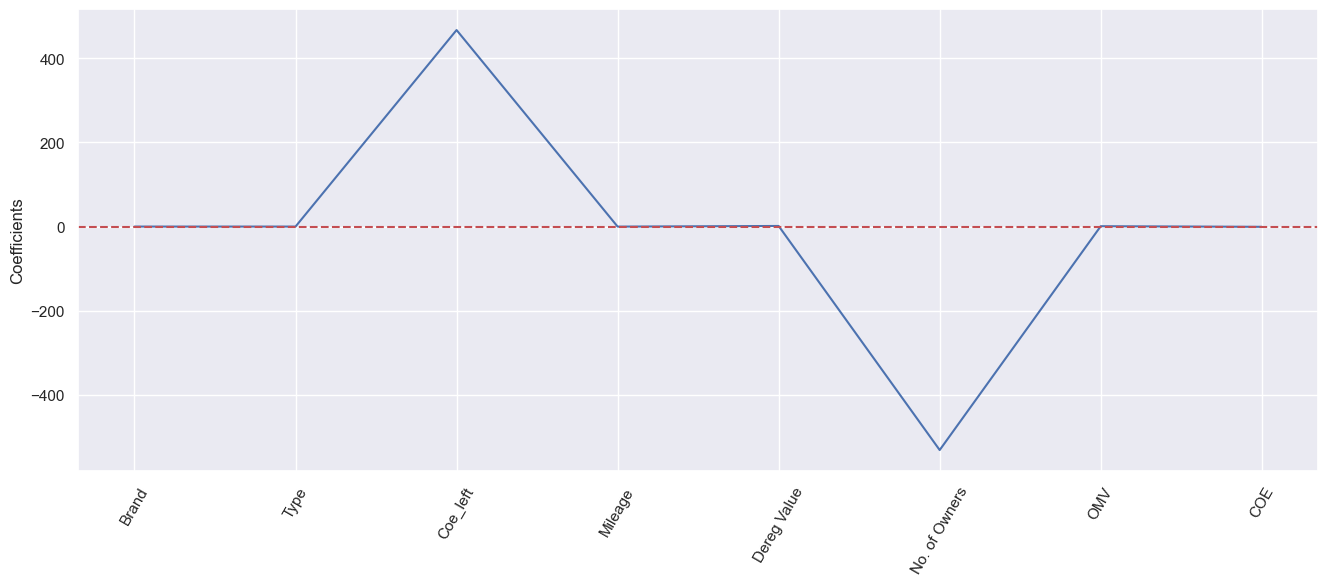

In [79]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

# Dummy variables for Brand and Type
brand_dummies = pd.get_dummies(carData['Brand'], prefix='Brand')
type_dummies = pd.get_dummies(carData['Type'], prefix='Type')

# Grouping all instances of the same brand together
brand_grouped = brand_dummies.groupby(brand_dummies.columns.str.split('_').str[0], axis=1).sum()

# Grouping all instances of the same type together
type_grouped = type_dummies.groupby(type_dummies.columns.str.split('_').str[0], axis=1).sum()

# Concatenate the grouped data with other features
X = pd.concat([brand_grouped, type_grouped, carData[['Coe_left', 'Mileage', 'Dereg Value', 'No. of Owners', 'OMV', 'COE']]], axis=1)

# Perform first split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Perform the second split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=100)

from sklearn.preprocessing import MinMaxScaler

# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(X_test)

# Create the model
lasso = Lasso(alpha=10.0, max_iter=10000)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(16, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')
plt.show()


The Lasso Regression algorithm has reduced the coefficients of brand, type, mileage, dereg_value, OMV and COE to close to zero, deeming them less important than the other two features. This comes in handy as we would face major multicollinearity issues if we included all of the features in our models.

In [80]:
from sklearn.metrics import mean_absolute_error

# Check the columns in X_train_temp to verify column names
print(X_train_temp.columns)

# Define columns to drop
cols_to_drop = ['Brand', 'Type', 'Mileage', 'Dereg Value', 'OMV', 'COE']

Index(['Brand', 'Type', 'Coe_left', 'Mileage', 'Dereg Value', 'No. of Owners',
       'OMV', 'COE'],
      dtype='object')


In [81]:
# Drop columns from training, validation, and test data
X_train_temp = X_train_temp.drop(columns=cols_to_drop, errors='ignore')
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_valid = X_valid.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')


In [82]:
# Create regressor
regressor = LinearRegression()

# Fit MLR model to training data
mlr = regressor.fit(X_train, y_train)

In [83]:
# Define a function for scoring
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(mae))
    print('Mean Squared Error: {:0.4f}'.format(mse))
    print('R^2 Score: {:0.4f}'.format(r2))

In [84]:
# Evaluate the performance
scoring(mlr, X_valid, y_valid)

Model Performance
Mean Absolute Error: 51366.6953
Mean Squared Error: 10956953221.1402
R^2 Score: 0.0705


MAE of approximately 51366.6953 suggests that, on average, the model's predictions are off by around $51366.70. Whether this is reasonable depends on the scale of your target variable. For example, if your target variable represents the price of used cars, an MAE of this magnitude might be acceptable, considering that car prices can vary widely.

An MSE of approximately 10956953221.1402 indicates that the average squared difference between the predicted and actual values is around $10,956,953,221.14. MSE is highly sensitive to outliers, as it squares the errors. 

R^2 score of approximately 0.0705 indicates that the model explains around 7.05% of the variance in the target variable. In other words, the model's predictions are not able to capture much of the variability present in the actual target values.